In [1]:
import scipy.stats as sp
import numpy as np
import matplotlib.pyplot as plt
from PIL import ImageFont, ImageDraw, Image
import cv2


%matplotlib inline


#이미지 호출에 따른 흑백 또는 컬러로 출력
def imshow(tit,image):
    plt.title(tit)
    if len(image.shape) == 3: #행렬의 크기가 나옴, 컬러영상일경우 3이 나옴
        plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    else: # 흑백영상일 경우 2가 나옴
        plt.imshow(image, cmap='gray')
    plt.show()
    plt.close()

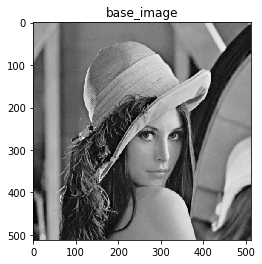

127.0


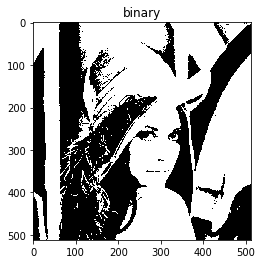

In [5]:
img = cv2.imread('./data/Lena.png', 0 ) # 값0은 흑백으로 읽어라, 안쓰면 컬러
imshow('base_image', img)
thr, mask = cv2.threshold(img, 127, 255, cv2.THRESH_BINARY)# 이진화하는 함수, 역치(문턱)값, 127보다 작은건 0, 큰건 255로 간주, 기본적인 이진화 방법 사용)
print(thr)
imshow('binary',mask)





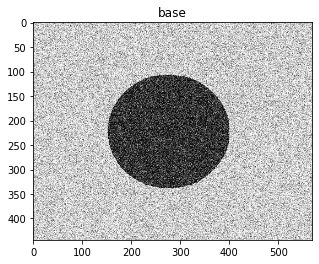

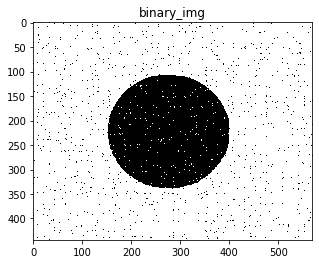

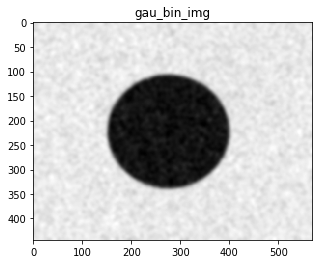

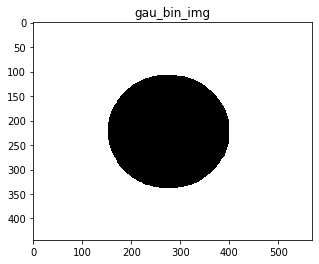

In [13]:
img = cv2.imread('./data/circle.png', 0 ) #노이즈로 인해 엣지가 너무 많음
imshow('base', img)


_,binary = cv2.threshold(img, 128, 255, cv2.THRESH_BINARY)
imshow('binary_img',binary)

#가우시안 블러 적용, 평균을 적용
img_blur = cv2.GaussianBlur(img, (21,21), 0 )
imshow('gau_bin_img',img_blur)
_,gau_binary = cv2.threshold(img_blur, 128, 255, cv2.THRESH_BINARY)
imshow('gau_bin_img',gau_binary)



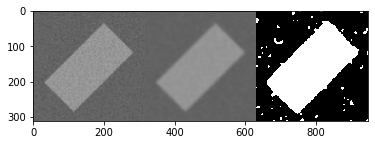

In [72]:
img = cv2.imread('./data/boxnoise.png', 0 ) #노이즈로 인해 엣지가 너무 많음


#for i in range(10, 200):
    
img_blur = cv2.GaussianBlur(img, (21,21), 0 )
_,binary = cv2.threshold(img_blur , 100, 255 , cv2.THRESH_BINARY) # 역치값이 작다는 것은, 구분이 잘 된다는 뜻이다., 색의 전경과 배경의 명암대비에 따라 달라짐
imshow('', np.hstack([img, img_blur, binary]))



In [92]:
_,binary = cv2.threshold(
    img_blur , 0, 255 , cv2.THRESH_BINARY + cv2.THRESH_OTSU ) #OTSU는 히스토그램에서 최적의 글로벌 임계 값을 결정함.
imshow('', np.hstack([img, img_blur, binary]))
#plt.hist(img.ravel(), 256, [0,256], color='b')


ValueError: all the input array dimensions except for the concatenation axis must match exactly

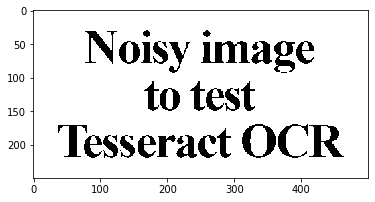

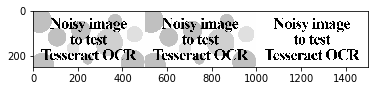

In [83]:
te_img = cv2.imread('./data/example_01.png', 0 )
_,binary = cv2.threshold(
    te_img , 0, 255 , cv2.THRESH_BINARY + cv2.THRESH_OTSU ) # 역치값이 작다는 것은, 구분이 잘 된다는 뜻이다., 색의 전경과 배경의 명암대비에 따라 달라짐
imshow('', binary)
imshow('', np.hstack([te_img, te_img, binary]))


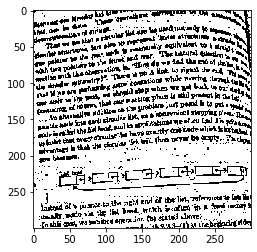

In [94]:
te_img = cv2.imread('./data/text.jpg', 0 )
img_blur = cv2.GaussianBlur(te_img, (3,3), 0 )

# # 명암 대비가 심함,수동으로 찾아도, OTSU 알고리즘(글로벌한 값을 찾는 함수) 해도 찾을 수 없다.
# # 지역적 분석이 필요함
# _,binary = cv2.threshold(
#     te_img , 90, 255 , cv2.THRESH_BINARY) 
#imshow('', binary)

#어댑티브 사용(지역적으로 분할해서 thresholding 함)
#평균보다 크면 전경, 작으면 배경으로 지정
binary = cv2.adaptiveThreshold(te_img, 255, 
                               cv2.ADAPTIVE_THRESH_GAUSSIAN_C, 
                               cv2.THRESH_BINARY, 21, 2) # 값이 2이이면, 평균이 70일떄 평균을 68로 보겠다는 의미, 0이면 기존평균값사용    
imshow('', binary)




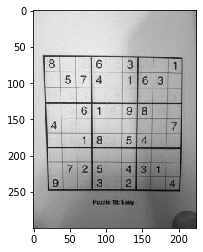

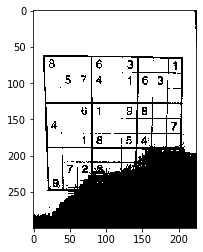

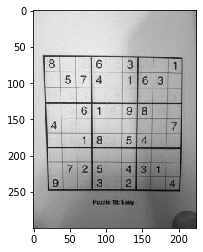

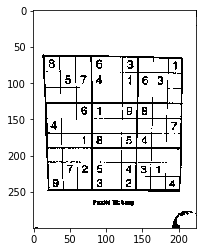

True

In [122]:
te_img = cv2.imread('./data/grid.jpg', 0 )
img_blur = cv2.GaussianBlur(te_img, (3,3), 0 )
imshow('', te_img)


#스레솔드 90이하는 0으로 처리
_,binary = cv2.threshold(
    te_img , 90, 255 , cv2.THRESH_BINARY) 

imshow('', binary)

imshow('', te_img)
#어댑티브 사용(지역적으로 분할해서 thresholding 함)
#평균보다 크면 전경, 작으면 배경으로 지정
binary = cv2.adaptiveThreshold(te_img, 255, 
                               cv2.ADAPTIVE_THRESH_GAUSSIAN_C, 
                               cv2.THRESH_BINARY, 101, 10) # 값이 2이이면, 평균이 70일떄 평균을 68로 보겠다는 의미, 0이면 기존평균값사용    
imshow('', binary)

cv2.imwrite('./data/after_grid.jpg',binary)


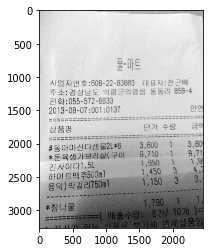

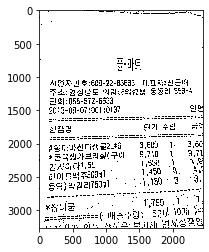

True

In [121]:
te_img = cv2.imread('./data/rrrrr.jpg', 0 )
imshow('', te_img)

#img_blur = cv2.GaussianBlur(te_img, (101,101), 0 )
#imshow('', img_blur)


# #스레솔드 90이하는 0으로 처리
# _,binary = cv2.threshold(
#     te_img , 90, 255 , cv2.THRESH_BINARY) 

# imshow('', binary)

#imshow('', te_img)
#어댑티브 사용(지역적으로 분할해서 thresholding 함)
#평균보다 크면 전경, 작으면 배경으로 지정
binary = cv2.adaptiveThreshold(te_img, 255, 
                               cv2.ADAPTIVE_THRESH_GAUSSIAN_C, 
                               cv2.THRESH_BINARY, 81, 7) # 값이 2이이면, 평균이 70일떄 평균을 68로 보겠다는 의미, 0이면 기존평균값사용    
imshow('', binary)

cv2.imwrite('./data/after_rrrr.jpg',binary)
